# **Agricultural Exports Categories Analysis**
*by Sergio Postigo and Víctor Diví*

## **1. Introduction**
Many countries base a big portion of their economies in foreign trade. Therefore, the customs agencies around the world collect data about every imported/exported good that passed across their ports, airports, borders, etc. In some countries, this data is open, and anyone can access to it to analyze it and make more informed decisions while importing or exporting goods. However, this data demands some challenges before its use. One of them is the labelling. For example, in Peru every time a good is imported/exported, a customs agent fills a form with the information of the product(s), where they include descriptions about it. Nonetheless, there isn´t a proper labelling, for instance in case we wanted to aggregate amounts imported/exported by category.

The labelling for goods is done manually mainly by consultancy agencies, who get this data to generate analytics reports for companies and institutions interested in foreign trade information of specific products. They usually use MS Excel spreadsheets to perform the labeling, which is not efficient and takes much time. We want to address this pain by automatizing the labelling process using Machine Learning.

## **2. Data Wrangling**
The data was provided from a consultancy company in Peru called RTM. They were hired by an agricultural export company who were interested in knowing which categories of products were exported from Peru from 2017 till 2021. RTM acquired the data from the company Veritrade, who consolidate foreign trade databases from many countries in South America.

RTM provided us the data in .xlsx format. We converted it into CSV (using Excel) and then proceed to import it into this notebook as DataFrame with the Pandas library. 

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv("../data/raw_data/data.csv", encoding='latin-1', sep=';')
data.head()

C:\Users\spost\AppData\Local\Temp\ipykernel_16340\3985896887.py:1: DtypeWarning: Columns (6,14,16,22,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/raw_data/data.csv", encoding='latin-1', sep=';')


,Partida Aduanera,Descripcion de la Partida Aduanera,Aduana,DUA,Fecha,Año,Cod. Tributario,Exportador en Perú,Importador Extranjero,Kg Bruto,...,Descripcion5,Naviera,Agente Carga(Origen),Agente Carga(Destino),Canal,Concatenar,Categoría macro Aurum,Subcategoría inicial,Subcategoría Consolidada Aurum,Categoría Consolidada Aurum
0,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,114358 | 1,11/19/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,"14302,53",...,RESTITUCION DERECHOS ARANC. (COD 13),NaN,NaN,NaN,NaN,ACEITUNAS ARAUCO PRESENTACION EN BIDONES RESTI...,Aceituna,Aceitunas Arauco,Otras Variedades De Aceituna,Aceituna
1,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,017611 | 1,2/21/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,"10686,93",...,RESTITUCION DERECHOS ARANC. (COD 13),YANGMING MARINE TRANSPORT CORP,NEW FORWARDING SOCIEDAD ANONIMA CERRADA,MAC-KAY CARGO LTDA RUT: 76.242.137-,NaN,ACEITUNAS ARAUCO PRESENTACION EN BIDONES VERDE...,Aceituna,Aceitunas Arauco,Otras Variedades De Aceituna,Aceituna
2,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,102610 | 11,10/16/2018,2018,20514935328,Oasis Olives S.A.C.,Oasis Fine Foods Pty Ltd,"584,16",...,NaN,PACIFIC INTERNATIONAL LINES,NaN,NaN,NaN,4 BIDONES ACEITUNA DE MESA ASCOLANA VERDE DESH...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna
3,709920000,ACEITUNAS,MARITIMA DEL CALLAO,059623 | 3,7/5/2018,2018,20342015108,Agroindustrias Nobex S.A.,Chains Trading Company Ltd.,"2696,51",...,SE ACOGE A RESTITUCION DE DERECHOS ARANCELARIO...,HAPAG-LLOYD A G,NaN,NaN,NaN,ACEITUNA ASCOLANA ENTERA 07-09 BID80L 58KG C/B...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna
4,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,114358 | 2,11/19/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,"3558,25",...,RESTITUCION DERECHOS ARANC. (COD 13),NaN,NaN,NaN,NaN,ACEITUNA ASCOLANO PRESENTACION EN BIDONES REST...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna


## **3. Exploratory Data Analysis**

Let's first describe the columns of the table

In [33]:
# Get all the columns
data.columns

Index(['Partida Aduanera', 'Descripcion de la Partida Aduanera', 'Aduana',
       'DUA', 'Fecha', 'Año', 'Cod. Tributario', 'Exportador en Perú',
       'Importador Extranjero', 'Kg Bruto', 'Kg Neto', 'Toneladas Netas',
       'Qty 1', 'Und 1', 'Qty 2', 'Und 2', 'U$ FOB Tot',
       'Miles de USD Fob TOTAL', 'U$ FOB Und 1', 'U$ FOB Und 2',
       'Pais de Destino', 'Puerto de destino', 'Último Puerto Embarque', 'Via',
       'Agente Portuario', 'Agente de Aduana', 'Descripcion Comercial',
       'Descripcion1', 'Descripcion2', 'Descripcion3', 'Descripcion4',
       'Descripcion5', 'Naviera', 'Agente Carga(Origen)',
       'Agente Carga(Destino)', 'Canal', 'Concatenar', 'Categoría macro Aurum',
       'Subcategoría inicial', 'Subcategoría Consolidada Aurum',
       'Categoría Consolidada Aurum'],
      dtype='object')

1. Partida Aduanera: Specific code of a product included in the Harmonized System of the World Customs Organization (WCO)

2. Descripcion de la Partida Aduanera: Description about the product associated with the customs code

3. Aduana: Customs office from which the export was performed

4. DUA:  Single Administrative Document, it is a document that gathers information about the shipping

5. Fecha: Shipping date

6. Año: Shipping year

7. Cod. Tributario: Tax code of the company exporting the good

8. Exportador en Perú: Company or entity exporting the good

9. Importador Extranjero: Company or entity importing the good

10. Kg Bruto: Weight of the good in kg, including the weight of the container or box

11. Kg Neto: Weight of good in kg, excluding the weight of the container or box

12. Toneladas Netas: Weight of good in tons, excluding the weight of the container or box

13. Qty 1: Quantity of the good in terms of a specific measurement unit (1)

14. Und 1: Unit of measurement (1)

15. Qty 2: Quantity of the good in terms of a specific measurement unit (2)

16. Und 2:  Unit of measurement (2)

17. US FOB Tot: The value of the goods at the exporter's customs frontier in USD

18. Miles de USD Fob TOTAL: The value of the goods at the exporter's customs frontier in thousands of USD

19. US FOB Und 1: The value of the goods by unity (1)

20. US FOB Und 2: The value of the goods by unity (2)

21. Pais de Destino: Country of destiny

22. Puerto de destino: Port of destiny

23. Último Puerto Embarque: Last port of shipment

24. Via: Via (air, see, maritime)

25. Agente Portuario: Port agent

26. Agente de Aduana: Customs agent

27. Descripcion Comercial: Commercial description of the good

28. Descripcion1: Commercial description portion 1

29. Descripcion2: Commercial description portion 2

30. Descripcion3: Commercial description portion 3

31. Descripcion4: Commercial description portion 4

32. Descripcion5: Commercial description portion 5

33. Naviera: Shipping company

34. Agente Carga(Origen): Load Agent (origin)

35. Agente Carga(Destino): Load Agent (destiny)

36. Canal: Selectivity channel. Type of control that the Customs Service will carry out on the merchandise to be exported. There are three channels: Green, Orange and Red

37. Concatenar: Column that concatenates 27, 28, 29, 30, 31, 32

38. Categoría macro Aurum: Designated category/label

39. Subcategoría inicial: Designated subcategories/sub-labels

40. Subcategoría Consolidada Aurum:  Designated subcategories/sub-labels (with less granularity, it groups some sub-categories in "others")

41. Categoría Consolidada Aurum: Designated category/label (with less granularity, it groups some categories in "others")

#### **Remark 1:**

All posible categories all labeled in *Categoria macro Aurum* and all possible subcategories are labelled in *Subcategoria inicial*. Aurum grouped some categories in *Categoria consolidada Aurum* as "others" and did the same in *Subcategoría Consolidada Aurum* for the subcategories. This last two columns were very likely a requirement from their client. He may have been interested specially in a list of categories and the rest were simply labeled as "others". However, what is from interest from us are the columns with all the categories and all the subcategories (*Categoria macro Aurum* and *Subcategoria inicial*). <br>

Let's analyze the distribution of the label columns: *Categoria macro Aurum* and *Subcategria inicial*

Check count of appearances of each class

In [34]:
data['Categoría macro Aurum'].value_counts()

Espárrago    139520
Uva          105704
Palta        102521
Arándano      45816
Mandarina     37820
Cebolla       37492
Café          30261
Flores        28433
Quinua        24355
Granada       12672
Maíz          11947
Ají            7814
Paprika        7178
Arveja         6140
Orégano        4997
Frejol         4994
Aceituna       4890
Fresa          3976
Tomate         3190
Papa           2699
Ajo            2228
Zapallo        2121
Alcachofa      1553
Arroz          1308
Trigo           957
Tuna            317
Avena           309
Alfalfa          73
Zanahoria        51
Frambuesa        22
Azúcar           22
Brócoli          10
Haba              2
Vid               2
Name: Categoría macro Aurum, dtype: int64

In [35]:
data['Subcategoría inicial'].value_counts()

Espárrago Fresco                                                                                                 111487
Palta Hass                                                                                                        49522
Palta Fresca Sin Variedad Especificada                                                                            42889
Arándanos Frescos Sin Variedad                                                                                    40881
Uvas No Identificadas                                                                                             40741
                                                                                                                  ...  
Arándanos Frescos Biloxi - Ventura - Emerald - Corrina - Dupree - Stella Blue                                         1
Arándanos Frescos Ventura - Sekoya                                                                                    1
Arándanos Frescos Ventura - Sekoya - Vic

As seen, there is an important class imbalance. Let's show this as a histogram

<AxesSubplot:>

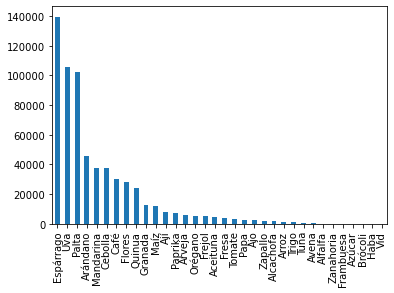

In [36]:
data['Categoría macro Aurum'].value_counts().plot(kind='bar')

<AxesSubplot:>

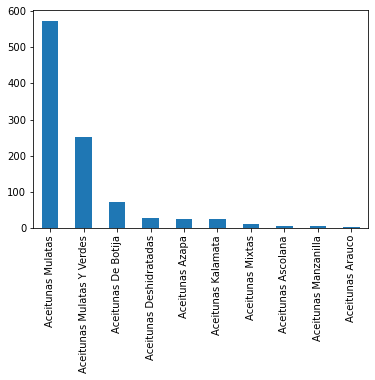

In [37]:
data['Subcategoría inicial'][:1000].value_counts().plot(kind='bar')

We can see that both columns have a big imbalance, and that the subcategory column has a lot of labels with very few rows. Most of these subcategories come from varieties of the same product and combinations of these varieties. For example, see the number of different subcategories that are subcategories of blueberries

In [38]:
data[data['Subcategoría inicial'].str.contains('Arándanos')]['Subcategoría inicial'].value_counts()

Arándanos Frescos Sin Variedad                                                                         40881
Arándanos Congelados Sin Variedad                                                                       1395
Arándanos Frescos Rojos                                                                                  882
Arándanos Frescos Ventura                                                                                564
Arándanos Varios Sin Mayor Detalle                                                                       332
                                                                                                       ...  
Arándanos Frescos Biloxi - Ventura - Emerald - Snowchaser - Stella Blue                                    1
Arándanos Frescos Biloxi - Ventura - Emerald - Springhigh                                                  1
Arándanos Frescos Bb-01 - Bb-03 - Bb-04                                                                    1
Arándanos Frescos B

Since this is likely to happen with more categories, we will keep **Categoría macro Aurum** as the target class we want to predict.
Besides, having 34 classes is more than enough, if we chose the subcategory, we would be dealing with more than 600 classes, and obtaining a decent classifier would be unrealistic.

#### **Remark 2:**

 *Descripcion1*, *Descripcion2*, *Descripcion3*, *Descripcion4* and *Descripcion5* concatenated build *Descripcion Comercial*

In [39]:
descriptions = data[[
    'Descripcion Comercial',
    'Descripcion1',
    'Descripcion2',
    'Descripcion3',
    'Descripcion4',
    'Descripcion5'
]].copy()
descriptions

,Descripcion Comercial,Descripcion1,Descripcion2,Descripcion3,Descripcion4,Descripcion5
0,ACEITUNAS ARAUCO PRESENTACION EN BIDONES RES...,ACEITUNAS ARAUCO,PRESENTACION EN BIDONES,NaN,NaN,RESTITUCION DERECHOS ARANC. (COD 13)
1,ACEITUNAS ARAUCO PRESENTACION EN BIDONES VERDE...,ACEITUNAS ARAUCO,PRESENTACION EN BIDONES,VERDE EN SAL,NaN,RESTITUCION DERECHOS ARANC. (COD 13)
2,4 BIDONES ACEITUNA DE MESA ASCOLANA VERDE DESH...,4 BIDONES ACEITUNA DE MESA ASCOLANA VERDE DESH...,4 DRUMS TABLE OLIVES ASCOLANA GREEN PPITED SIZ...,NaN,NaN,NaN
3,ACEITUNA ASCOLANA ENTERA 07-09 BID80L 58KG C/B...,ACEITUNA ASCOLANA ENTERA 07-09,BID80L 58KG C/B,NaN,NaN,SE ACOGE A RESTITUCION DE DERECHOS ARANCELARIO...
4,ACEITUNA ASCOLANO PRESENTACION EN BIDONES RE...,ACEITUNA ASCOLANO,PRESENTACION EN BIDONES,NaN,NaN,RESTITUCION DERECHOS ARANC. (COD 13)
...,...,...,...,...,...,...
631389,ZAPALLO(CALABAZA)FRESCO ZAPALLO(CALABAZA)FRESC...,ZAPALLO(CALABAZA)FRESCO,ZAPALLO(CALABAZA)FRESCO,ZAPALLO(CALABAZA)FRESCO,ZAPALLO(CALABAZA)FRESCO,ZAPALLO(CALABAZA)FRESCO
631390,ZAPALLO......... ZAPALLO......... ZAPALLO........,ZAPALLO.........,ZAPALLO.........,ZAPALLO.........,ZAPALLO.........,ZAPALLO.........
631391,ZAPALLOCODIGO Nº13 RESTITUCION DE DERECHOS ARA...,ZAPALLOCODIGO Nº13 RESTITUCION DE DERECHOS ARA...,ZAPALLOCODIGO Nº13 RESTITUCION DE DERECHOS ARA...,ZAPALLOCODIGO Nº13 RESTITUCION DE DERECHOS ARA...,ZAPALLOCODIGO Nº13 RESTITUCION DE DERECHOS ARA...,ZAPALLOCODIGO Nº13 RESTITUCION DE DERECHOS ARA...
631392,ZAPALLOS / PUMPKINS ZAPALLOS FRESCOS ACTA DE I...,ZAPALLOS / PUMPKINS,ZAPALLOS FRESCOS,ACTA DE INSPECCION BOE. 31622017SUNAT.,NaN,NaN


In [40]:

descriptions.fillna('', inplace=True)

descriptions['Concatenated_Descriptions'] = descriptions['Descripcion1'] + ' ' + descriptions['Descripcion2'] + ' ' + \
                                            descriptions['Descripcion3'] + ' ' + descriptions['Descripcion4'] + ' ' + \
                                            descriptions['Descripcion5']

descriptions['Concatenated_Descriptions'] = descriptions['Concatenated_Descriptions'].str.strip()
descriptions['Equal?'] = descriptions['Descripcion Comercial'] == descriptions['Concatenated_Descriptions']

descriptions[['Descripcion Comercial', 'Concatenated_Descriptions', 'Equal?']]

,Descripcion Comercial,Concatenated_Descriptions,Equal?
0,ACEITUNAS ARAUCO PRESENTACION EN BIDONES RES...,ACEITUNAS ARAUCO PRESENTACION EN BIDONES RES...,True
1,ACEITUNAS ARAUCO PRESENTACION EN BIDONES VERDE...,ACEITUNAS ARAUCO PRESENTACION EN BIDONES VERDE...,True
2,4 BIDONES ACEITUNA DE MESA ASCOLANA VERDE DESH...,4 BIDONES ACEITUNA DE MESA ASCOLANA VERDE DESH...,True
3,ACEITUNA ASCOLANA ENTERA 07-09 BID80L 58KG C/B...,ACEITUNA ASCOLANA ENTERA 07-09 BID80L 58KG C/B...,True
4,ACEITUNA ASCOLANO PRESENTACION EN BIDONES RE...,ACEITUNA ASCOLANO PRESENTACION EN BIDONES RE...,True
...,...,...,...
631389,ZAPALLO(CALABAZA)FRESCO ZAPALLO(CALABAZA)FRESC...,ZAPALLO(CALABAZA)FRESCO ZAPALLO(CALABAZA)FRESC...,True
631390,ZAPALLO......... ZAPALLO......... ZAPALLO........,ZAPALLO......... ZAPALLO......... ZAPALLO........,True
631391,ZAPALLOCODIGO Nº13 RESTITUCION DE DERECHOS ARA...,ZAPALLOCODIGO Nº13 RESTITUCION DE DERECHOS ARA...,True
631392,ZAPALLOS / PUMPKINS ZAPALLOS FRESCOS ACTA DE I...,ZAPALLOS / PUMPKINS ZAPALLOS FRESCOS ACTA DE I...,False


In [41]:
descriptions['Equal?'].value_counts()

True     596457
False     34937
Name: Equal?, dtype: int64

In [42]:
descriptions[descriptions['Equal?'] == False]

,Descripcion Comercial,Descripcion1,Descripcion2,Descripcion3,Descripcion4,Descripcion5,Concatenated_Descriptions,Equal?
15,"ACEITUNA AZAPA NEGRA ENTERA CON CAROCO, CALIBR...",ACEITUNA AZAPA NEGRA ENTERA,"CON CAROCO, CALIBRE 110/130",EN BIDONES,,,"ACEITUNA AZAPA NEGRA ENTERA CON CAROCO, CALIBR...",False
23,ACEITUNA AZAPITA EN SALMUERA EN BIDONES DE 60...,ACEITUNA,AZAPITA EN SALMUERA,EN BIDONES DE 60 KG NETOS DRENADOS C/U,"IMPROPIAS PARA EL CONSUMO INMEDIATO, CALIBRE:1...",CODIGO Nº13 RESTITUCION DE DERECHOS ARANCELARIOS,ACEITUNA AZAPITA EN SALMUERA EN BIDONES DE 60 ...,False
26,ACEITUNAS NEGRAS AZAPAS CON PEPA COLOCADAS EN ...,ACEITUNAS NEGRAS AZAPAS CON PEPA,COLOCADAS EN 270 BARRILES PLASTICO Y C/U CONT...,50% CALIBRE 110130,50% CALIBRE 130-160,,ACEITUNAS NEGRAS AZAPAS CON PEPA COLOCADAS EN ...,False
27,ACEITUNAS NEGRAS AZAPAS PERUANA CON PEPA COLOC...,ACEITUNAS NEGRAS AZAPAS PERUANA CON PEPA,COLOCADAS EN 270 BARRILES PLASTICO,Y C/U CONTIENE 60 KGS DRENADOS,,,ACEITUNAS NEGRAS AZAPAS PERUANA CON PEPA COLOC...,False
28,ACEITUNAS NEGRAS AZAPAS PERUANA CON PEPA COLOC...,ACEITUNAS NEGRAS AZAPAS PERUANA CON PEPA,COLOCADAS EN 270 BARRILES PLASTICO Y C/U CONT...,"SIENDO CALIBRES: 200240, 240280, 280320",,,ACEITUNAS NEGRAS AZAPAS PERUANA CON PEPA COLOC...,False
...,...,...,...,...,...,...,...,...
631332,ZAPALLO MACRE X 400GR - EXPOEN 5 PALETAS (100 ...,ZAPALLO MACRE X 400GR - EXPOEN 5 PALETAS (100 ...,ZAPALLO MACRE X 400GR - EXPOEN 5 PALETAS (100 ...,ZAPALLO MACRE X 400GR EXPOEN 5 PALETAS (100 CA...,ZAPALLO MACRE X 400GR - EXPOEN 5 PALETAS (100 ...,ZAPALLO MACRE X 400GR - EXPOEN 5 PALETAS (100 ...,ZAPALLO MACRE X 400GR - EXPOEN 5 PALETAS (100 ...,False
631334,ZAPALLO MACRE X 400GR -EXPO5000 LATAS X 400GRS...,ZAPALLO MACRE X 400GR -EXPO5000 LATAS X 400GRS...,ZAPALLO MACRE X 400GR -EXPO5000 LATAS X 400GRS...,ZAPALLO MACRE X 400GR EXPO5000 LATAS X 400GRSE...,ZAPALLO MACRE X 400GR -EXPO5000 LATAS X 400GRS...,ZAPALLO MACRE X 400GR -EXPO5000 LATAS X 400GRS...,ZAPALLO MACRE X 400GR -EXPO5000 LATAS X 400GRS...,False
631350,ZAPALLO MACRECODIGO Nº13 RESTITUCION DE DERECH...,ZAPALLO MACRECODIGO Nº13 RESTITUCION DE DERECH...,ZAPALLO MACRECODIGO Nº13 RESTITUCION DE DERECH...,ZAPALLO MACRECODIGO Nº13 RESTITUCION DE DERECH...,ZAPALLO MACRECODIGO Nº13 RESTITUCION DE DERECH...,ZAPALLO MACRECODIGO Nº13 RESTITUCION DE DERECH...,ZAPALLO MACRECODIGO Nº13 RESTITUCION DE DERECH...,False
631387,ZAPALLO ZAPALLO FRESCO CONGELADO CONGELADO (-2...,ZAPALLO,ZAPALLO FRESCO CONGELADO,CONGELADO (20°C),,,ZAPALLO ZAPALLO FRESCO CONGELADO CONGELADO (20°C),False


Let's check what happens in a row where *Equal?* is false

In [43]:
index = descriptions[descriptions['Equal?'] == False].index[0]
print(descriptions.iloc[index]['Descripcion Comercial'])
print(descriptions.iloc[index]['Concatenated_Descriptions'])

ACEITUNA AZAPA NEGRA ENTERA CON CAROCO, CALIBRE 110/130 EN  BIDONES
ACEITUNA AZAPA NEGRA ENTERA CON CAROCO, CALIBRE 110/130 EN BIDONES


It seems that when trimming the column *Descripcion Comercial* into *Description* 1,2,3,4 and 5, Veritrade removed some characters, in this case some white spaces.
That is why when we reconstruct the *Concatenated_Descriptions* from *Description* 1,2,3,4 and 5 we don't get the exactly same string as in *Descripcion Comercial*.
In fact, let's check how many are different if we remove all whitespaces

In [44]:
descriptions['Concatenated_Descriptions_no_ws'] = descriptions['Concatenated_Descriptions'].str.replace(' ', '')
descriptions['Descripcion Comercial_no_ws'] = descriptions['Descripcion Comercial'].str.replace(' ', '')
descriptions['Equal_no_ws'] = descriptions['Descripcion Comercial_no_ws'] == descriptions[
    'Concatenated_Descriptions_no_ws']
descriptions['Equal_no_ws'].value_counts()

True     611185
False     20209
Name: Equal_no_ws, dtype: int64

In [45]:
index = descriptions[descriptions['Equal_no_ws'] == False].index[4]
print(descriptions.iloc[index]['Descripcion Comercial'])
print(descriptions.iloc[index]['Concatenated_Descriptions'])

ACEITUNA BOTIJA EN SALMUERA ORGANICO OLIVICO PRESENTACION : FRASCOS LOTE : 001-2020 USO : CONSUMO HUMANO
ACEITUNA BOTIJA EN SALMUERA ORGANICO OLIVICO PRESENTACION : FRASCOS LOTE : 0012020 USO : CONSUMO HUMANO


Additionally, we can make an additional remark here: *Descripcion Comercial* has repeated sentences in its values, as is showed in the example below, likely due to different description fields containing the same. This will have to be cleaned.

In [46]:
index = descriptions[descriptions['Descripcion1'] == descriptions['Descripcion2']].index[0]
descriptions.iloc[index]

Descripcion Comercial              ACEITUNA BOTIJA / BLACK OLIVE IN BRINE 1X2KG. ...
Descripcion1                       ACEITUNA BOTIJA / BLACK OLIVE IN BRINE 1X2KG. ...
Descripcion2                       ACEITUNA BOTIJA / BLACK OLIVE IN BRINE 1X2KG. ...
Descripcion3                       ACEITUNA BOTIJA / BLACK OLIVE IN BRINE 1X2KG. ...
Descripcion4                       ACEITUNA BOTIJA / BLACK OLIVE IN BRINE 1X2KG. ...
Descripcion5                       ACEITUNA BOTIJA / BLACK OLIVE IN BRINE 1X2KG. ...
Concatenated_Descriptions          ACEITUNA BOTIJA / BLACK OLIVE IN BRINE 1X2KG. ...
Equal?                                                                         False
Concatenated_Descriptions_no_ws    ACEITUNABOTIJA/BLACKOLIVEINBRINE1X2KG.(CAL.170...
Descripcion Comercial_no_ws        ACEITUNABOTIJA/BLACKOLIVEINBRINE1X2KG.(CAL.170...
Equal_no_ws                                                                    False
Name: 37, dtype: object

#### **Remark 3:**

The column *Concatenar* concatenates *Descripcion Comercial* and *Descripcion1*, *2,3,4* and *5*. Thus, it basically has a concatenation of two times the string from *Descripcion Comercial*. It seems that the consultants didn't know that *Descripcion1*, *2,3,4* and *5* are trims of *Descripcion Comercial*. Maybe they thought this extra columns contained additional information and that is why they decided to concatenate everything in the "Concatenar" column to then process the information from here.

#### **Remark 4:**

For each *Partida aduanera* there is only one possible *Descripcion de la partida aduanera*.

In [47]:
# Create a temporal dataframe 
descriptions = data[["Partida Aduanera", "Descripcion de la Partida Aduanera"]].copy()
# Remove duplicated rows
descriptions.drop_duplicates(inplace=True)
# Get the number of rows
print(
    "The number of all combinations of the columns *Partida Aduanera* and *Descripcion de la Partida Aduanera* are " + str(
        descriptions.shape[0]))
# Get the number of unique values of *Partida Aduanera*
print("The number of unique values of the column *Partida Aduanera* is " + str(
    descriptions['Partida Aduanera'].nunique()))
# Get the number of unique values of *Descripcion de la Partida Aduanera*
print("The number of unique values of the column *Descripcion de la Partida Aduanera* is " + str(
    descriptions['Descripcion de la Partida Aduanera'].nunique()))
descriptions

The number of all combinations of the columns *Partida Aduanera* and *Descripcion de la Partida Aduanera* are 220
The number of unique values of the column *Partida Aduanera* is 220
The number of unique values of the column *Descripcion de la Partida Aduanera* is 201


,Partida Aduanera,Descripcion de la Partida Aduanera
0,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ..."
3,709920000,ACEITUNAS
47,712909000,"DEMAS HORTALIZAS,MEZCLAS DE HORTALIZAS,CORTADA..."
75,709600000,"PIMIENTOS DEL GENERO """"CAPSIUM"""" O """"PIMIENTA""..."
747,708200000,"FRIJOLES(FREJOLES,POROTOS,ALUBIAS,JUDIAS) (VIG..."
...,...,...
628515,1204009000,"SEMILLA DE LINO, EXCEPTO PARA SIEMBRA, INCLUSO..."
628532,1108110000,ALMIDON DE TRIGO
628554,1001992000,MORCAJO (TRANQUILLÓN)
628918,802900000,"LOS DEMAS FRUTOS DE CASCARA, FRESCOS O SECOS, ..."


There are some values of *Descripcion de la partida aduanera* that correspond to multiple values of *Partida Aduanera*

In [48]:
# Get the values of *Descripcion de la Partida Aduanera* that are related to multiple values of *Partida Aduanera*
descriptions[descriptions.duplicated(['Descripcion de la Partida Aduanera'], keep=False)].sort_values(
    by=['Descripcion de la Partida Aduanera'])

,Partida Aduanera,Descripcion de la Partida Aduanera
4879,603199000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
127592,603129000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
128022,603149000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
58226,713609000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
601093,713349000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
93615,713359000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
3871,904229000,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
585226,904211090,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
584597,904219000,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
286679,1008509000,"LOS DEMÁS ALFORFÓN, MIJO Y ALPISTE; LOS DEMÁS ..."


This is very likely an error in the customs agency systems, we will have to deal with it

#### **Remark 5:**

Since we are dealing with agricultural items, we can presume that there is a seasonal influence in the dates in which they are exported. Let's test this assumption

We will compare the *Partida aduanera* with the date column names *Fecha*

In [49]:
# Get the columns *Partida Aduanera* and *Fecha*
descriptions = data[["Partida Aduanera", "Fecha"]].copy()
# Cast the column of date (*Fecha*) to datetime
descriptions['Fecha'] = pd.to_datetime(descriptions['Fecha'], format='%m/%d/%Y')
# Count the exports by date
descriptions['Count of exports'] = descriptions.groupby(['Partida Aduanera', 'Fecha'])['Fecha'].transform('count')
descriptions.drop_duplicates(inplace=True)
# Sort the dataframe
descriptions.sort_values(by=['Partida Aduanera', 'Fecha'])

,Partida Aduanera,Fecha,Count of exports
457891,603110000,2017-01-03,2
457856,603110000,2017-01-04,2
458374,603110000,2017-01-06,1
457824,603110000,2017-01-10,2
457888,603110000,2017-01-11,2
...,...,...,...
61077,2101300000,2020-01-22,1
65633,2101300000,2020-08-18,1
61056,2101300000,2020-11-11,1
60064,2101300000,2021-02-11,1


Sample randomly some values of "Partida Aduanera" to plot

In [50]:
# Import random library
import random

# Number of samples
samples_qty = 6
# Get samples from *Partida Aduanera* (without repetitions)
samples = random.sample(list(dict.fromkeys(descriptions['Partida Aduanera'].tolist())), samples_qty)
print("The random selected values from *Partida Aduanera* are: ")
print(samples)
# Create a list with the dataframes of each sample
samples_dfs = []
for sample in samples:
    samples_dfs.append(
        descriptions[descriptions['Partida Aduanera'] == sample].sort_values(by=["Partida Aduanera", "Fecha"])[
            ['Fecha', 'Count of exports']])
# For each dataframe, populate the missing dates (imputing values of 0 for Count of exports)
populated_samples_dfs = []
for sample_df in samples_dfs:
    dates = pd.date_range(sample_df['Fecha'].min(), sample_df['Fecha'].max())
    sample_df.set_index('Fecha', inplace=True)
    sample_df = sample_df.reindex(dates, fill_value=0)  #this can't be done inplace
    populated_samples_dfs.append(sample_df)


The random selected values from *Partida Aduanera* are: 
[713399200, 904211090, 1211903000, 713319000, 710100000, 1005901100]


Let's plot all the selected samples

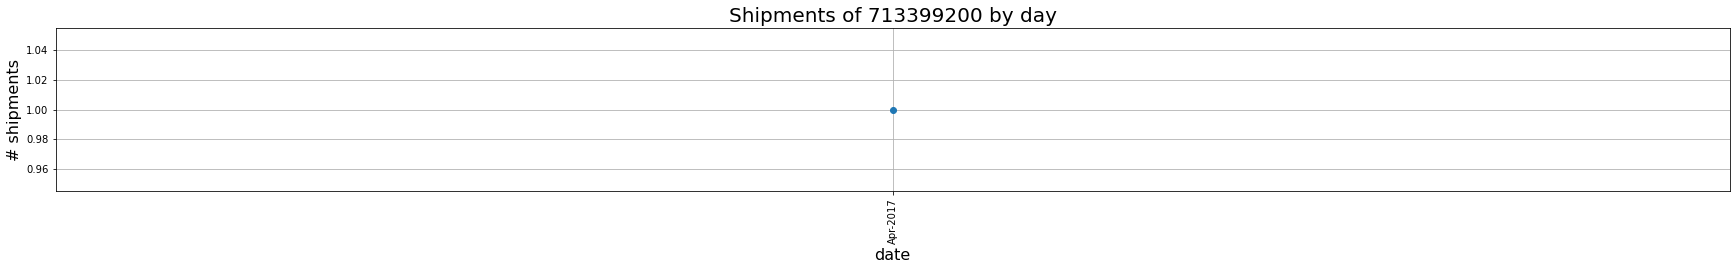

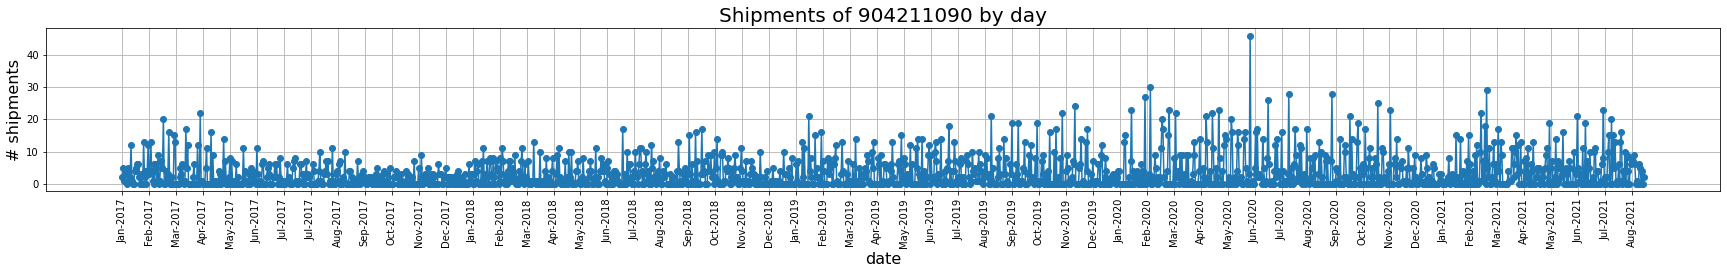

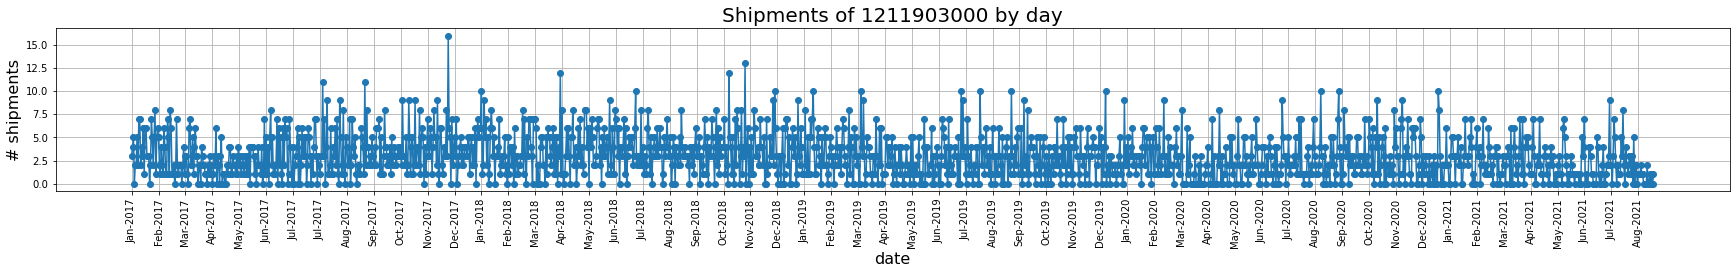

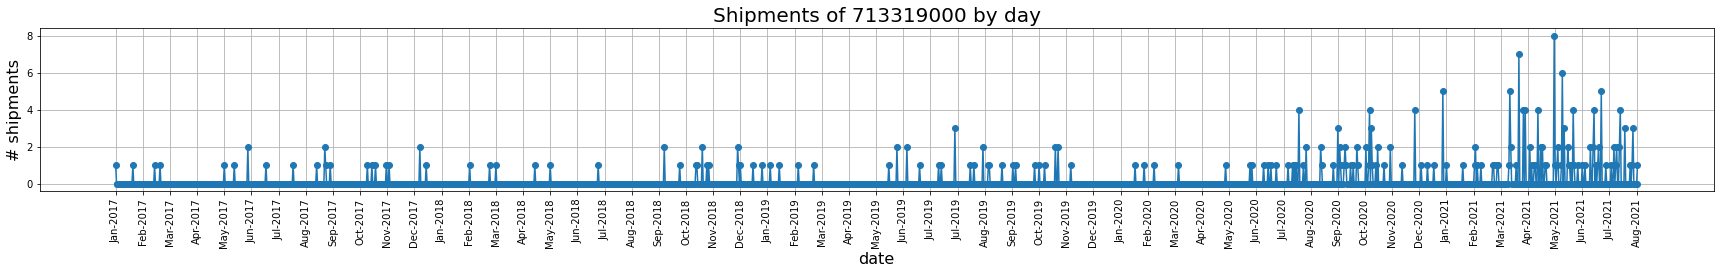

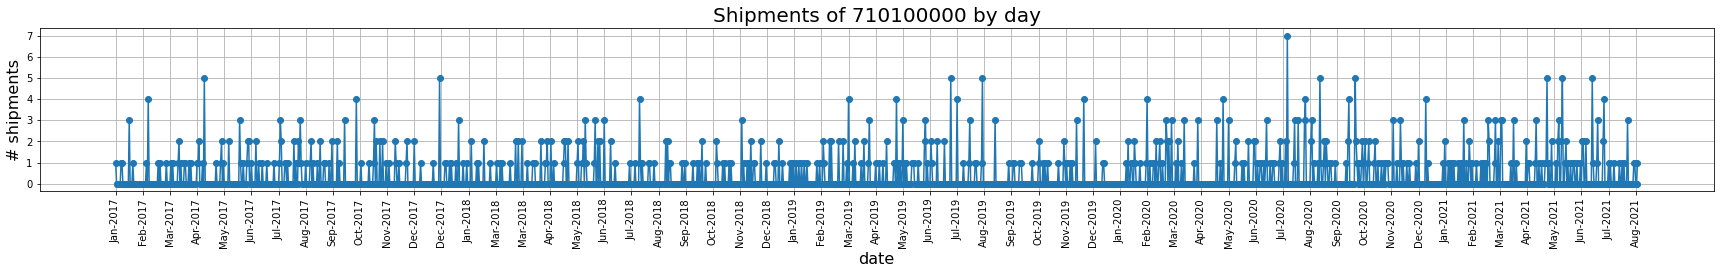

In [51]:
# Import matplotlib
import matplotlib.pyplot as plt

for i in range(0, len(populated_samples_dfs) - 1):
    #----------------------------------------------------------------
    # GRAPH
    #----------------------------------------------------------------

    # size:
    plt.figure(figsize=(30, 3))

    # title:
    plt.title('Shipments of ' + str(samples[i]) + ' by day', fontsize=20)

    # x axis:
    # x values
    x = range(0, len(populated_samples_dfs[i].index.date.tolist()))
    # x ticks
    my_xticks = populated_samples_dfs[i].index.date.tolist()
    for c in range(0, len(my_xticks)):
        my_xticks[c] = my_xticks[c].strftime('%h-%Y')
    plt.xticks(x[::30], my_xticks[::30], rotation='vertical')
    # # x label
    plt.xlabel("date", fontsize=16)

    # y axis:
    # y values
    y = populated_samples_dfs[i]["Count of exports"].tolist()
    # y ticks
    #plt.yticks(np.arange(populated_samples_dfs[i]["Count of exports"].min(), populated_samples_dfs[i]["Count of exports"].max()+1, 1))

    # y label
    plt.ylabel("# shipments", fontsize=16)

    # create plot
    plt.plot(x, y, marker='o')

    plt.grid()

    # show plot
    plt.show()

    #----------------------------------------------------------------

As we can see, some products (represented by its *Partida Aduanera* number) present a seasonal pattern (as expected) but others not.

#### **Remark 6**

The custom agents in Peru fills the column *Importador Extranjero*. Thus, we presume that there may be inconsistencies in the naming of the same company in different rows. Let's check this

We take as an example the *Importador Extranjero* value of "Comercial Agricola Montoliva Ltda.". Let's check the rows have a similar name (more than 90% similarity using Levenshtein Algorithm)

In [52]:
# Import Levenshtein
import Levenshtein

# Get the colum *Importador Extranjero*
df = pd.DataFrame(data, columns=['Importador Extranjero'])
# Add a column with the similarity magnitude according to Levenshtein Algorithm
df["Similarity"] = df.apply(lambda row: Levenshtein.ratio(row['Importador Extranjero'], "Comercial Agricola Montoliva Ltda."), axis=1)
# Filter rows with more than 90% similarity
df.iloc[(df["Similarity"] >= 0.90).values]


,Importador Extranjero,Similarity
0,Comercial Agricola Montoliva Ltda.,1.000000
1,Comercial Agricola Montoliva Ltda.,1.000000
4,Comercial Agricola Montoliva Ltda.,1.000000
157,Comercial Agricola Montoliva Ltda.,1.000000
158,Comercial Agricola Montoliva Ltda.,1.000000
162,Comercial Agricola Montoliva Ltda,0.985075


As seen, rows referring to the same company in the *Importador Extranjero* column, have slightly different values. This must be cleaned in the next section.

Let's check now for *Exportador en Peru*. We will use a random company as an example

In [53]:
# Get the colum *Importador Extranjero*
df = pd.DataFrame(data, columns=['Exportador en Perú'])
# Random company
company = df.sample()['Exportador en Perú'].values[0]
print("The company to be analyzed is: " + company)
# Add a column with the similarity magnitude according to Levenshtein Algorithm
df["Similarity"] = df.apply(lambda row: Levenshtein.ratio(row['Exportador en Perú'], company), axis=1)
# Filter rows with more than 90% similarity
df.iloc[(df["Similarity"] >= 0.9).values]

The company to be analyzed is: Agroexportaciones Nathanael S.A.C.


,Exportador en Perú,Similarity
132224,Agroexportaciones Nathanael S.A.C.,1.0
132228,Agroexportaciones Nathanael S.A.C.,1.0
132229,Agroexportaciones Nathanael S.A.C.,1.0
132231,Agroexportaciones Nathanael S.A.C.,1.0
132236,Agroexportaciones Nathanael S.A.C.,1.0
...,...,...
267845,Agroexportaciones Nathanael S.A.C.,1.0
267846,Agroexportaciones Nathanael S.A.C.,1.0
267847,Agroexportaciones Nathanael S.A.C.,1.0
267848,Agroexportaciones Nathanael S.A.C.,1.0


Check how many unique values are in each column:

In [54]:
df.iloc[(df["Similarity"] >= 0.8).values].nunique()

Exportador en Perú    8
Similarity            7
dtype: int64

We know from Aurum that the column *Exportador en Perú* is filled from a dropdown menu. So, since it's not "typed" there are no inconsistencies. This is aligned with the results we are getting above regarding this column. As such, there is no need to clean this column.

#### **Remark 7:**

The column *Descripcion de la Partida Aduanera* gives general information about the associated product code of *Partida aduanera*, while the column "Descripcion Comercial" contains more detailed information. Let's study this columns

In [55]:
# Select the three columns of interest
df = data[["Partida Aduanera", "Descripcion de la Partida Aduanera", "Descripcion Comercial"]]
# Get the cardinality of *Partida aduanera*
print("There are " + str(len(df['Partida Aduanera'].unique())) + " different codes of Partida Aduanera in total")
# Get the cardinality of *Descripcion de la Partida Aduanera*
print("There are " + str(len(df[
                                 'Descripcion de la Partida Aduanera'].unique())) + " different values of Descripcion de la Partida Aduanera in total")
# Get the cardinality of *Partida aduanera*
print("There are " + str(
    len(df['Descripcion Comercial'].unique())) + " different values of Descripcion Comercial in total")


There are 220 different codes of Partida Aduanera in total
There are 201 different values of Descripcion de la Partida Aduanera in total
There are 98606 different values of Descripcion Comercial in total
